# SVM Project 

The objetive of this project is to make use of support vector machine models to detect possible breast cancer cases.

Useful links. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

# Import

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns =data.feature_names)

In [4]:
print(data.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# y = data.target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# EDA

In [8]:
# sns.pairplot(df)

# Training and Testing Data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.3, random_state=101)

# Training the Model

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC()

In [13]:
model.fit(X_train, y_train)

SVC()

# Predicting Test Data

In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  3 102]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# GridSearch

In [20]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [27]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [28]:
grid_predictions = grid.predict(X_test)

In [29]:
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


In [30]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# Evaluating the Model

<AxesSubplot:>

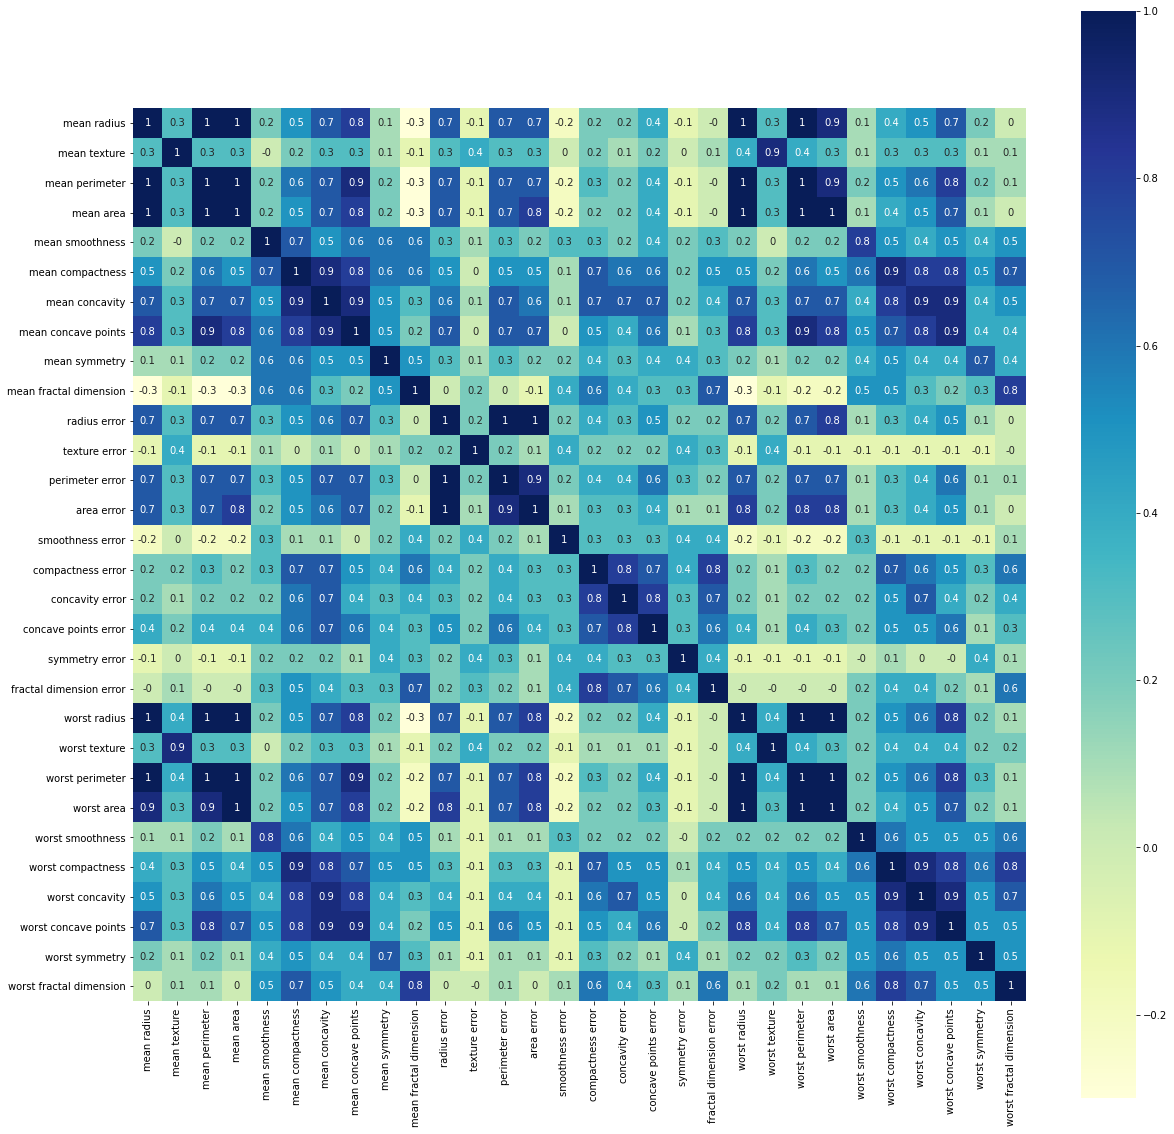

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr().round(1), cmap="YlGnBu", annot=True, square=True)